In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py as h5
from scipy.optimize import curve_fit
from qutip import *

In [2]:
matplotlib.rcParams.update(
        {"font.family": "STIXGeneral",
         "xtick.labelsize": 20,
         "xtick.direction": "in",
         "xtick.major.pad": 8,
         "xtick.top": True,
         "ytick.right": True,
         "ytick.direction": "in",
         "ytick.labelsize": 20,
#          "axes.prop_cycle": (matplotlib.cycler("color", ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])),
         "axes.labelsize": 20,
         "axes.labelpad": 10,
         "axes.grid": True
    }
)

In [6]:
1 / (4 * 731e-6)

341.9972640218878

In [3]:
s = "scan_data"

# Calib Rotations

In [551]:
cd rabi_2021-08-29

[Errno 2] No such file or directory: 'rabi_2021-08-29'
/Users/josephbroz/Desktop/nlqm/data/rabi_2021-08-29


In [552]:
d1 = h5.File("1644_27.h5", "r")[s]
d2 = h5.File("1651_51.h5", "r")[s]
d3 = h5.File("1656_08.h5", "r")[s]

y,x = list(d1.keys())

y1 = d1[y][()]
y2 = d2[y][()]
y3 = d3[y][()]
x1 = np.linspace(0, 0.25, 13)
x2 = np.linspace(0.08, 0.18, 9)
x3 = np.linspace(0.13, 0.14, 10)

Text(0, 0.5, 'Probability of\ndark state detection')

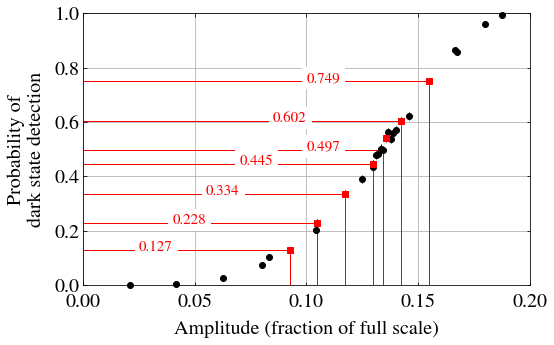

In [553]:
fig, ax = plt.subplots(figsize=(8, 5))
l1 = ax.errorbar(x1[1:-3], y1[1:-3], yerr=np.sqrt(y1[1:-3] * (1 - y1[1:-3])) / np.sqrt(1000), marker="o", lw=0, color="k", elinewidth=1)
l2 = ax.errorbar(x2, y2, yerr=np.sqrt(y2 * (1 - y2)) / np.sqrt(1000), marker="o", lw=0, color="k", elinewidth=1)
l3 = ax.errorbar(x3, y3, yerr=np.sqrt(y3 * (1 - y3)) / np.sqrt(1000), marker="o", lw=0, color="k", elinewidth=1)
xused = x2[1:-2]
yused = y2[1:-2]
l4 = ax.errorbar(xused, yused, yerr=np.sqrt(yused * (1 - yused)) / np.sqrt(1000), marker="s", lw=0, color="red", elinewidth=1)
l5 = ax.errorbar(x3[5], y3[5], marker="s",  color="red", lw=0)
for i in range(len(xused)):
    ax.vlines(xused[i], ymin=0, ymax=yused[i], color="red", lw=1)
    ax.hlines(yused[i], xmin=0, xmax=xused[i], color="red", lw=1)
    ax.annotate("{}".format(yused[i]), (.015 * i + 0.025, yused[i]), color="red", fontsize=15, backgroundcolor="w")
ax.vlines(x3[4], ymin=0, ymax=y3[4], color="red", lw=1)
ax.hlines(y3[4], xmin=0, xmax=x3[4], color="red", lw=1)
ax.annotate("{}".format(y3[4]), (.015 * i + 0.025, y3[4]), color="red", fontsize=15, backgroundcolor="w")

l1[0].set_clip_on(False)
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 1.)
plt.xlabel("Amplitude (fraction of full scale)")
plt.ylabel("Probability of\ndark state detection")

# Bsb ramsey data (raw)

In [554]:
def unpack(s1, s2, s3):
    if type(s1) != str:
        s1 = "{:.2f}".format(s1).replace(".", "_")
        s2 = "{:.2f}".format(s2).replace(".", "_")
        s3 = "{:.2f}".format(s3).replace(".", "_")
    loc = "../ramsey_2021-08-29/"
    f1 = h5.File(loc + s1 + ".h5", "r")
    f2 = h5.File(loc + s2 + ".h5", "r")
    f3 = h5.File(loc + s3 + ".h5", "r")
    y,x = list(f1[s].keys())
    a,b,c = f1[s][y][()], f2[s][y][()], f3[s][y][()]
    f1.close()
    f2.close()
    f3.close()
    return [a, b, c]

In [555]:
data = [[] for i in range(5)]
data[0].append(unpack("1829_20", "1830_22", "1831_44"))
data[0].append(unpack("2125_31", "2126_33", "2127_35"))
data[0].append(unpack("1951_56", "1952_58", "1954_00"))
data[0].append(unpack("2120_57", "2122_04", "2123_06"))
data[0].append(unpack("1906_18", "1907_20", "1908_22"))
data[0].append(unpack("1947_22", "1948_23", "1949_26"))
data[1].append(unpack(2140.33, 2141.38, 2142.40))
data[1].append(unpack(1942.57, 1943.59, 1945.00))
data[1].append(unpack(2158.34, 2159.35, 2200.37))
data[1].append(unpack(1854.54, 1855.56, 1856.58))
data[1].append(unpack(1850.20, 1849.19, 1850.20))
data[1].append(unpack(2202.32, 2203.34, 2204.49))
data[2].append(unpack(2145.27, 2147.18, 2149.10))
data[2].append(unpack(1835.06, 1836.58, 1838.50))
data[2].append(unpack(2151.56, 2153.47, 2155.39))
data[2].append(unpack(1910.34, 1912.26, 1914.18))
data[2].append(unpack(2133.32, 2135.23, 2137.15))
data[2].append(unpack(1956.13, 1958.05, 1956.13))
data[3].append(unpack(2010.19, 2012.11, 2014.02))
data[3].append(unpack(2024.08, 2026.00, 2027.52))
data[3].append(unpack(1859.40, 1901.32, 1903.23))
data[3].append(unpack(1936.18, 1938.10, 1940.02))
data[3].append(unpack(2017.14, 2019.06, 2020.57))
data[3].append(unpack(1841.36, 1843.28, 1845.20))
data[4].append(unpack(1927.10, 1929.52, 1932.34))
data[4].append(unpack(2031.20, 2034.02, 2036.44))
data[4].append(unpack(1825.44, 1823.02, 1825.44))
data[4].append(unpack(2050.09, 2052.51, 2055.33))
data[4].append(unpack(2040.45, 2043.27, 2046.08))
data[4].append(unpack(1917.46, 1920.28, 1923.09))

In [556]:
def plot_raw_data(m, title=""):
    fig, ax = plt.subplots(3, 2, figsize=(10, 5))
    for j in range(2):
        for i in range(3):
            for k in range(3):
                ϕ_label = ["ϕ", "ϕ + π/2", "ϕ + π"]
                label = ϕ_label[k]
                if i != 0 or j != 0:
                    label = None
                x = [0, np.pi/2, np.pi]
                y = data[m][i + j][k]
                ax[i, j].errorbar(x, y, yerr=np.sqrt(y * (1 - y)) / np.sqrt(1000), marker="o", label=label)
                if i != 2 and i != 5:
                    ax[i,j].set_xticks([]) 
                    ax[i,j].set_xticklabels([])
                else:
                    ax[i,j].set_xticks([0, np.pi/2, np.pi]) 
                    ax[i,j].set_xticklabels(["0", r"$\frac{π}{2}$", "π"])
                if j == 1:
                    ax[i, j].set_yticks([])
                    ax[i, j].set_yticklabels([])
                else:
                    ax[i, j].set_yticks([0, 0.5, 1])
                    ax[i, j].set_yticklabels([0, 0.5, 1], fontsize=15)
            ax[i, j].grid(False)
            ax[i, j].set_ylim(0, 1)
            ax[i, j].plot([], [], label=r"$α_0^2 = {}$".format(y2[(3 * j) + i + 1]), lw=0)
            ax[i, j].legend()
    plt.suptitle(title, fontsize=20)
    plt.savefig("data.pdf")
    plt.show()

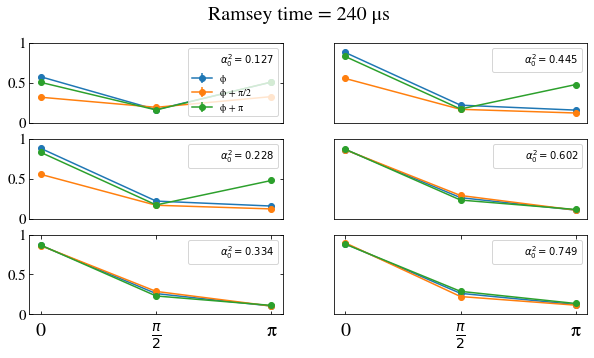

In [557]:
plot_raw_data(0, "Ramsey time = 240 μs")

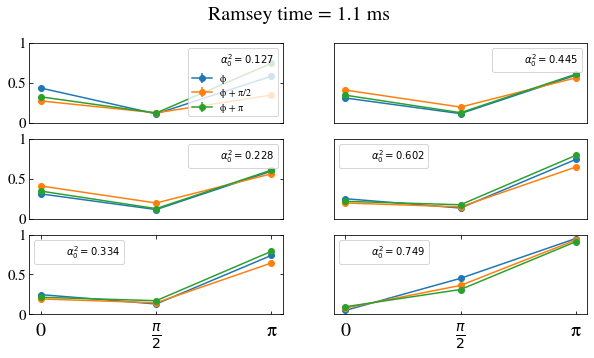

In [558]:
plot_raw_data(1, "Ramsey time = 1.1 ms")

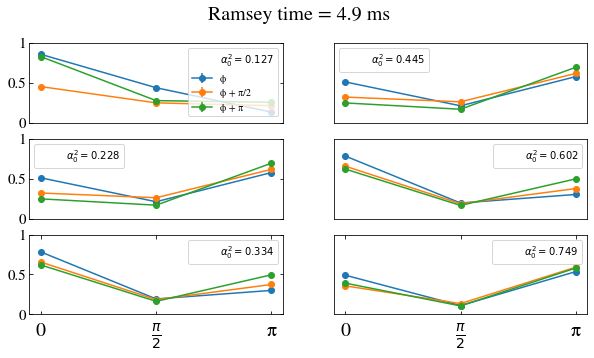

In [559]:
plot_raw_data(2, "Ramsey time = 4.9 ms")

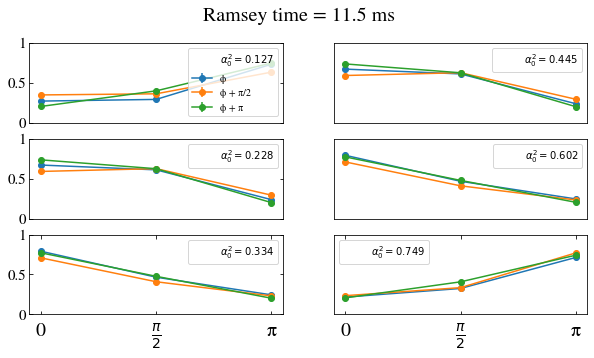

In [560]:
plot_raw_data(3, "Ramsey time = 11.5 ms")

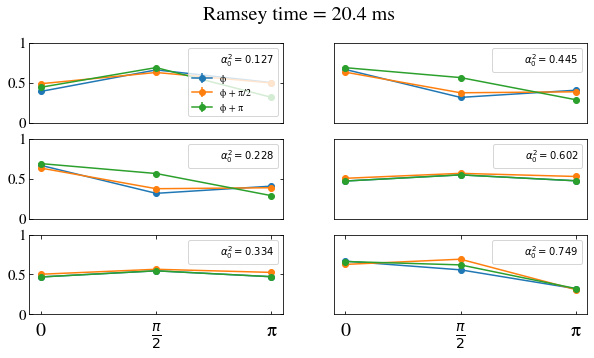

In [561]:
plot_raw_data(4, "Ramsey time = 20.4 ms")

# bsb data processed

In [562]:
def calc_phase(x, wc=False):
    x = np.array(x)
    xerr = np.sqrt(x * (1 - x) / 1000)
    B = (x[0] + x[2]) / 2
    N = x[1] - B
    D = x[0] - B
    ϕ = np.arctan2(N, D)
    e1 = (1 / (np.abs(x[0] - B))) * (xerr[1] + (xerr[0] + xerr[2]) / 2)
    e2 = (np.abs(x[1] - B) / (x[0] - B)**2) * (xerr[0] + xerr[2]) / 2
    E = e1 + e2
    error = E / (1 + (N/D)**2)
    if not wc:
        return ϕ, error 
    else:
        return ϕ, error, B, 2 * (x[0] - B) / np.cos(ϕ)

In [563]:
def calc_run(X):
    B_mean = []
    B_err = []
    ϕ_vals = []
    ϕ_raw_vals = []
    ϕ_raw_err = []
    ϕ_vals_error = []
    for x in X:
        ϕ = []
        ϕ_err = []
        for point in x:
            a,b = calc_phase(point)
            ϕ.append(a)
            ϕ_err.append(b)
        b_mean = (ϕ[0] + ϕ[-1]) / 2
        b_err = (ϕ_err[0] + ϕ_err[-1]) / 2
        B_err.append(b_err)
        B_mean.append(b_mean)
        ϕ_vals.append(ϕ[1] - b_mean)
        ϕ_vals_error.append(ϕ_err[1] + b_err)
        ϕ_raw_vals.append(ϕ[1])
        ϕ_raw_err.append(ϕ_err[1])
    return np.array(ϕ_vals), np.array(ϕ_vals_error), B_mean, B_err, ϕ_raw_vals, ϕ_raw_err

(-3.141592653589793, 3.141592653589793)

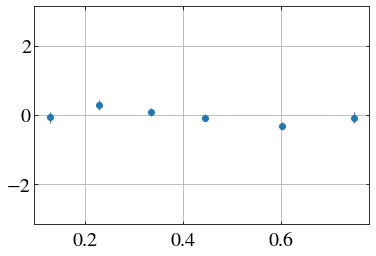

In [564]:
a,b,c,d,e,f = calc_run(data[0])
plt.errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=1)
plt.ylim(-np.pi, np.pi)

(-3.141592653589793, 3.141592653589793)

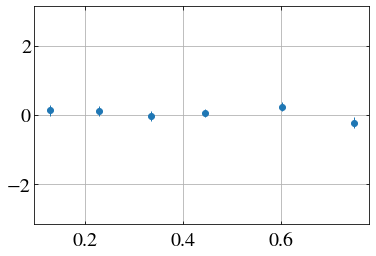

In [565]:
a,b,c,d,e,f = calc_run(data[1])
plt.errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=1)
plt.ylim(-np.pi, np.pi)

(-3.141592653589793, 3.141592653589793)

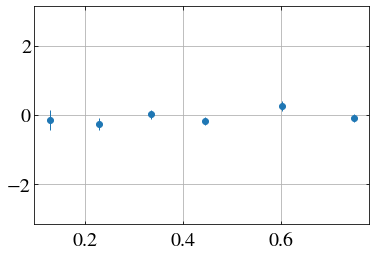

In [566]:
a,b,c,d,e,f = calc_run(data[2])
plt.errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=1)
plt.ylim(-np.pi, np.pi)

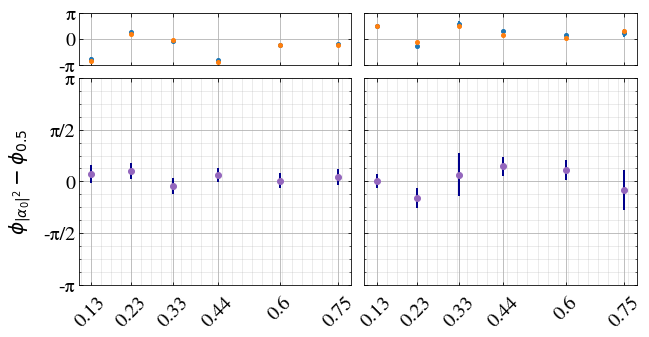

In [567]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 4]})
a,b,c,d,e,f = calc_run(data[3])
ax[0, 0].errorbar(yused, e, yerr=f, marker="o", lw=0, elinewidth=2, ms=4)
ax[0, 0].errorbar(yused, c, yerr=d, marker="o", lw=0, elinewidth=2, ms=4)
ax[0, 0].set_xticks(yused)
ax[0, 0].set_xticklabels([])
ax[0, 1].set_xticks(yused)
ax[0, 1].set_xticklabels([])
ax[0, 0].set_yticks([-np.pi, 0, np.pi])
ax[0, 0].set_yticklabels(["-π", "0", "π"])
ax[0,1].tick_params(axis="y", which="both", labelleft=False, labelright=False)
ax[0, 1].set_yticks([-np.pi, 0, np.pi])
ax[0, 1].set_yticklabels(["-π", "0", "π"])
ax[0, 1].set_ylim(-np.pi, np.pi)
ax[0, 0].set_ylim(-np.pi, np.pi)
ax[1,0].errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0)
# ax[1,0].errorbar(yused, a, marker="o", lw=0, elinewidth=2, color="C2", ecolor="darkblue", capsize=0)
# ax[1,0].fill_between(yused, a-b, a+b, alpha=0.1, color="C0")
a,b,c,d,e,f = calc_run(data[4])
ax[0,1].errorbar(yused, e, yerr=f, marker="o", lw=0, elinewidth=2, ms=4)
ax[0,1].errorbar(yused, c, yerr=d, marker="o", lw=0, elinewidth=2, ms=4)
ax[1,1].errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0)
# ax[1,1].errorbar(yused, a, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0)
# ax[1,1].fill_between(yused, a-b, a+b, alpha=0.1, color="C0")
ax[1,0].set_xticks(yused)
ax[1,0].set_xticklabels([round(i, ndigits=2) for i in yused], rotation=45)
ax[1,0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1,0].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax[1,1].set_xticks(yused)
ax[1,1].set_xticklabels([round(i, ndigits=2) for i in yused], rotation=45)
ax[1,1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1,1].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax[1,0].minorticks_on()
ax[1,1].minorticks_on()
ax[1,0].tick_params(axis="x", which="minor", bottom=False, top=False)
ax[1,1].tick_params(axis="x", which="minor", bottom=False, top=False)
ax[1,1].tick_params(axis="y", which="both", labelleft=False, labelright=False)
plt.ylim(-np.pi, np.pi)
ax[1,0].grid(True, alpha=0.3, axis="y", which="minor")
ax[1,1].grid(True, alpha=0.3, axis="y", which="minor")
ax[1,0].grid(True, alpha=0.3, axis="x", which="minor")
ax[1,1].grid(True, alpha=0.3, axis="x", which="minor")
ax[1,0].set_ylabel(r"$ϕ_{|α_0|^2} - ϕ_{0.5}$")
# ax[0,0].set_ylabel(r"$ϕ_{|α_0|^2} - ϕ_{0.5}$)
# ax[0, 0].grid(False, axis="y")
# ax[0, 1].grid(False, axis="y")
# ax[1, 0].set_xlim(0, 1)
# ax[0, 0].set_xlim(0, 1)
# ax[0, 0].set_ylabel(r"$ϕ_{0.5}$", fontsize=15)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("../main_result.pdf")

In [568]:
e = 0.30282
# e = 1.602e-19
m = 1.66e-27
ħ = 1.055e-34
ω = 2 * np.pi * 1e6
T = 1e-3
ϵ0 = 4 * np.pi * 8.854e-12
c = 3e8

In [464]:
def unpack(s1, s2):
    t0 = 11 * 3600 + 40 * 60 + 9
    if type(s1) != str:
        s1 = "{:.2f}".format(s1).replace(".", "_")
        s2 = "{:.2f}".format(s2).replace(".", "_")
    hr = int(s1[:2])
    minute = int(s1[2:4])
    sec = int(s1[-2:])
    t = hr * 3600 + minute * 60 + sec
    time = t - t0
    loc = "../2021-09-01/ramsey/"
    f1 = h5.File(loc + s1 + ".h5", "r")
    f2 = h5.File(loc + s2 + ".h5", "r")
    y,x = list(f1[s].keys())
    a,b = f1[s][y][()], f2[s][y][()]
    f1.close()
    f2.close()
    return [a, b], t

In [465]:
dta = []
dta.append(unpack(1145.09, 1147.03))
dta.append(unpack(1157.03, 1158.55))
dta.append(unpack(1214.03, 1215.56))
dta.append(unpack(1235.39, 1237.31))
dta.append(unpack(1247.29, 1249.21))
dta.append(unpack(1259.18, 1301.10))
dta.append(unpack(1311.17, 1313.10))
dta.append(unpack(1323.13, 1325.05))
dta.append(unpack(1335.04, 1336.56))
dta.append(unpack(1346.56, 1348.50))
dta.append(unpack(1358.51, 1400.44))

dta.append(unpack(1412.32, 1414.25))
dta.append(unpack(1424.25, 1426.18))
dta.append(unpack(1439.06, 1440.59))
dta.append(unpack(1451.01, 1452.54))
dta.append(unpack(1502.54, 1504.46))
dta.append(unpack(1516.44, 1518.36))
dta.append(unpack(1528.34, 1530.26))
dta.append(unpack(1540.23, 1542.16))
dta.append(unpack(1552.13, 1554.05))
dta.append(unpack(1604.02, 1605.54))

dta.append(unpack(1615.54, 1617.47))
dta.append(unpack(1942.07, 1944.08))
dta.append(unpack(2000.45, 2003.12))
dta.append(unpack(2030.20, 2032.12))
dta.append(unpack(2046.44, 2048.37))
dta.append(unpack(2059.13, 2101.06))
dta.append(unpack(2111.03, 2112.58))
dta.append(unpack(2137.32, 2139.24))
dta.append(unpack(2149.24, 2151.16))
dta.append(unpack(2202.39, 2204.34))
dta.append(unpack(2216.26, 2218.19))
dta.append(unpack(2228.18, 2230.13))
dta.append(unpack(2240.34, 2242.26))
dta.append(unpack(2252.24, 2254.17))
# dta.append(unpack(2304.18, 2306.10))
dta.append(unpack(2337.00, 2338.53))
dta.append(unpack(2348.53, 2350.46))
dta.append(unpack("0012_39", "0015_02"))
dta.append(unpack("0028_04", "0029_57"))
dta.append(unpack("0043_22", "0045_14"))

In [466]:
dta1 = []
dta1.append(unpack(1150.34, 1153.16))
dta1.append(unpack(1202.32, 1205.14))
dta1.append(unpack(1229.11, 1231.53))
dta1.append(unpack(1241.00, 1243.43))
dta1.append(unpack(1252.50, 1255.33))
dta1.append(unpack(1304.46, 1307.29))
dta1.append(unpack(1316.42, 1319.24))
dta1.append(unpack(1328.34, 1331.17))
dta1.append(unpack(1340.26, 1343.09))
dta1.append(unpack(1352.21, 1355.03))
dta1.append(unpack(1406.03, 1408.46))
dta1.append(unpack(1417.56, 1420.38))
dta1.append(unpack(1429.48, 1435.14))
dta1.append(unpack(1444.30, 1447.14))
dta1.append(unpack(1456.24, 1459.07))
dta1.append(unpack(1507.29, 1510.11))
dta1.append(unpack(1522.06, 1524.48))
dta1.append(unpack(1533.55, 1536.37))
dta1.append(unpack(1545.44, 1548.26))
dta1.append(unpack(1557.33, 1600.16))
dta1.append(unpack(1609.23, 1612.09))
dta1.append(unpack(1950.06, 1952.50))
dta1.append(unpack(2021.54, 2024.36))
dta1.append(unpack(2035.35, 2038.18))
dta1.append(unpack(2052.43, 2055.26))
dta1.append(unpack(2104.34, 2107.17))
dta1.append(unpack(2131.01, 2133.43))
dta1.append(unpack(2142.55, 2145.37))
dta1.append(unpack(2156.09, 2158.52))
dta1.append(unpack(2208.08, 2210.50))
dta1.append(unpack(2221.49, 2224.31))
dta1.append(unpack(2234.04, 2236.47))
dta1.append(unpack(2245.56, 2248.39))
dta1.append(unpack(2257.50, 2300.32))
dta1.append(unpack(2309.40, 2312.22))
dta1.append(unpack(2342.23, 2345.06))
dta1.append(unpack("0006_09", "0008_52"))
dta1.append(unpack("0018_32", "0021_15"))
dta1.append(unpack("0033_27", "0036_10"))
dta1.append(unpack("0052_10", "0054_53"))

In [492]:
ϕ_list = []
e_list = []
A_list = []
B_list = []
ϕ1_list = []
ϕ2_list = []
ϕ1e_list = []
ϕ2e_list = []
time = []
for d in dta:
    ϕ1, e1, B, A1 = calc_phase(d[0][0], wc=True)
    ϕ2, e2, B, A2 = calc_phase(d[0][1], wc=True)
    ϕ1_list.append(ϕ1)
    ϕ2_list.append(ϕ2)
    ϕ_list.append(ϕ1 - ϕ2)
    e_list.append(e1 + e2)
    ϕ1e_list.append(e1)
    ϕ2e_list.append(e2)
    A_list.append((A1+A2)/2)
    B_list.append(B)
    time.append(d[1])

In [504]:
np.array(ϕ2e_list) - np.array(ϕ1e_list)

array([-0.0375256 , -0.03544106, -0.06717701, -0.02276483, -0.06468914,
       -0.02257679, -0.05301088, -0.00125337,  0.03180916, -0.01741273,
       -0.03705893, -0.01088138,  0.00409495, -0.09150048, -0.04269524,
       -0.07141566, -0.06185271, -0.04665701,  0.03270253, -0.00770142,
       -0.26698011, -0.02495323,  0.03752072, -0.01401616, -0.0184886 ,
        0.01564019, -0.03416065, -0.01114846, -0.06912007, -0.02972414,
       -0.04782221, -0.04076091, -0.04892342, -0.07897479, -0.06138921,
       -0.05724804, -0.06557606, -0.06843015, -0.12286866, -0.19606807])

(-3.141592653589793, 3.141592653589793)

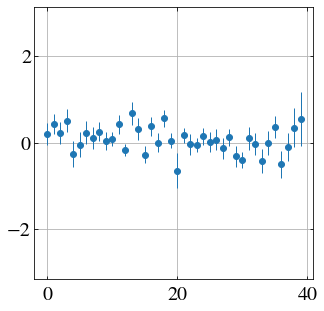

In [468]:
fig, ax = plt.subplots(figsize=(5,5))
ax.errorbar(range(len(ϕ_list)), ϕ_list, yerr=e_list, marker="o", lw=0, elinewidth=1)
plt.ylim(-np.pi, np.pi)

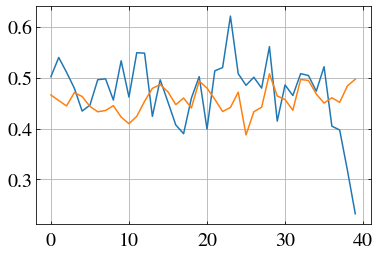

In [469]:
plt.plot(range(len(ϕ_list)), A_list)
plt.plot(range(len(ϕ_list)), B_list)

In [493]:
ϕ_list1 = []
e_list1 = []
A_list1 = []
B_list1 = []
ϕ1_list1 = []
ϕ2_list1 = []
ϕ1e_list1 = []
ϕ2e_list1 = []
time1 = []
for d in dta1:
    ϕ1, e1, B1, A1 = calc_phase(d[0][0], wc=True)
    ϕ2, e2, B2, A2 = calc_phase(d[0][1], wc=True)
    ϕ1_list1.append(ϕ1)
    ϕ2_list1.append(ϕ2)
    ϕ_list1.append(ϕ1 - ϕ2)
    e_list1.append(e1 + e2)
    ϕ1e_list1.append(e1)
    ϕ2e_list1.append(e2)
#     print(e1, e2)
    A_list1.append((A1 + A2)/2)
    B_list1.append((B1 + B2)/2)
    time1.append(d[1])

(-180, 180)

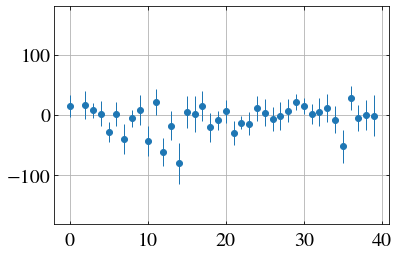

In [494]:
plt.errorbar(range(len(ϕ_list1)), np.array(ϕ_list1) * 180/np.pi, yerr=np.array(e_list1) * 180/np.pi, marker="o", lw=0, elinewidth=1)
plt.ylim(-180, 180)
# plt.plot(range(len(ϕ_list1)), np.array(A_list1) * 500 - 180)


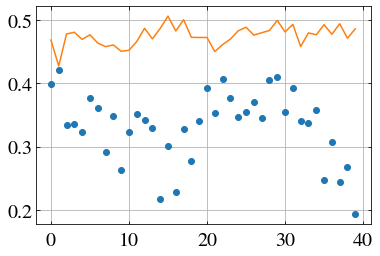

In [423]:
plt.plot(range(len(ϕ_list1)), A_list1, marker="o", lw=0)
plt.plot(range(len(ϕ_list1)), B_list1)

In [432]:
np.mean(ϕ_list1) * 180/np.pi

1.2521435591961412

In [433]:
np.std(ϕ_list1) * 180/np.pi

50.58718431786482

In [434]:
np.mean(e_list1) * 180 / np.pi

21.452099732136872

In [435]:
np.mean(ϕ_list1) * 180/np.pi

1.2521435591961412

In [436]:
np.std(ϕ_list) * 180/np.pi

17.182020400100523

In [437]:
np.mean(ϕ_list) * 180/np.pi

4.351187158280605

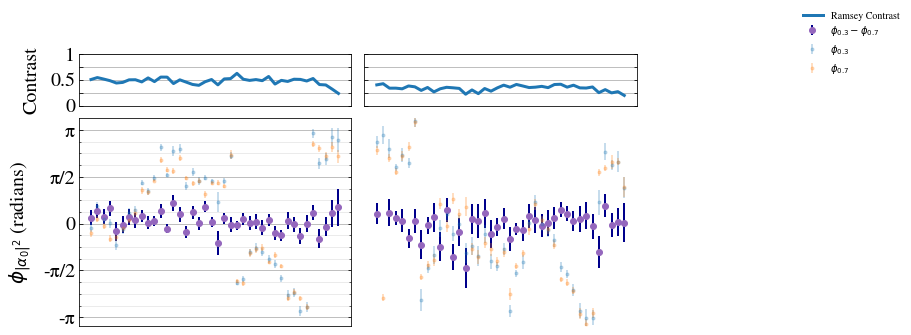

In [520]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 4]})
a = ϕ_list
b = e_list
yused = range(len(ϕ_list))
ax[0, 0].errorbar(yused, A_list, lw=3, elinewidth=2, ms=4)
ax[0, 0].set_xticks([])
ax[0, 0].set_xticklabels([])
ax[0, 1].set_xticks([])
ax[0, 1].set_xticklabels([])
ax[0, 0].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[0, 0].set_yticklabels(["0", "", "0.5", "","1"])
ax[0,1].tick_params(axis="y", which="both", labelleft=False, labelright=False)
ax[0, 1].set_yticks([0, 0.25, 0.5, 0.75, 1])
ax[0, 1].set_yticklabels(["0", "", "0.5", "","1"])
ax[0, 1].set_ylim(0, 1)
ax[0, 0].set_ylim(0, 1)
ax[1,0].errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0)
ax[1, 0].errorbar(yused, ϕ1_list, yerr=ϕ1e_list, marker="o", lw=0, elinewidth=2, color="C0", ms=3, alpha=0.25)
ax[1, 0].errorbar(yused, ϕ2_list, yerr=ϕ2e_list, marker="o", lw=0, elinewidth=2, color="C1", ms=3, alpha=0.25)
# ax[1,0].errorbar(yused, a, marker="o", lw=0, elinewidth=2, color="C2", ecolor="darkblue", capsize=0)
# ax[1,0].fill_between(yused, a-b, a+b, alpha=0.1, color="C0")

a = ϕ_list1
b = e_list1
yused = range(len(ϕ_list1)) #time1
ax[0,1].errorbar(yused, A_list1, lw=3, elinewidth=2, ms=4, label="Ramsey Contrast")
ax[1,1].errorbar(yused, a, yerr=b, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0, label=r"$ϕ_{0.3} - ϕ_{0.7}$")
ax[1, 1].errorbar(yused, ϕ1_list1, yerr=ϕ1e_list1, marker="o", lw=0, elinewidth=2, color="C0", ms=3, alpha=0.25, label=r"$ϕ_{0.3}$")
ax[1, 1].errorbar(yused, ϕ2_list1, yerr=ϕ2e_list1, marker="o", lw=0, elinewidth=2, color="C1", ms=3, alpha=0.25,  label=r"$ϕ_{0.7}$")
ax[0, 1].legend(bbox_to_anchor=(2,2), framealpha=0)
ax[1, 1].legend(bbox_to_anchor=(1.925,1.5), framealpha=0)
# ax[1,1].errorbar(yused, a, marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0)
# ax[1,1].fill_between(yused, a-b, a+b, alpha=0.1, color="C0")
ax[1,0].set_xticks([])
ax[1,0].set_xticklabels([])
ax[1,0].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1,0].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax[1,1].set_xticks([])
ax[1,1].set_xticklabels([])
# ax[1,1].set_xticks(yused)
# ax[1,1].set_xticklabels([round(i, ndigits=2) for i in yused], rotation=45)
ax[1,1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1,1].set_yticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax[1,0].minorticks_on()
ax[1,1].minorticks_on()
ax[1,0].tick_params(axis="x", which="minor", bottom=False, top=False)
ax[1,1].tick_params(axis="x", which="minor", bottom=False, top=False)
ax[1,1].tick_params(axis="y", which="both", labelleft=False, labelright=False)
plt.ylim(-np.pi, np.pi)
ax[1,0].grid(True, alpha=0.3, axis="y", which="minor")
ax[1,1].grid(True, alpha=0.3, axis="y", which="minor")
ax[1,0].grid(False, axis="x")
ax[1,1].grid(False, axis="x")
ax[1,0].set_ylabel(r"$ϕ_{|α_0|^2}$ (radians)")
ax[0,0].set_ylabel("Contrast")
# ax[0,0].set_ylabel(r"$ϕ_{|α_0|^2} - ϕ_{0.5}$)
ax[0, 0].grid(False, axis="x")
ax[0, 1].grid(False, axis="x")
# ax[1, 0].set_xlim(0, 1)
# ax[0, 0].set_xlim(0, 1)
# ax[0, 0].set_ylabel(r"$ϕ_{0.5}$", fontsize=15)
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("../main_result.pdf")

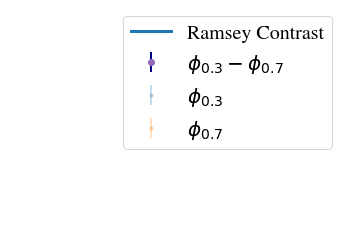

In [534]:
plt.errorbar([], [], lw=3, label="Ramsey Contrast")
plt.errorbar([], [], yerr=[], marker="o", lw=0, elinewidth=2, color="C4", ecolor="darkblue", capsize=0, label=r"$ϕ_{0.3} - ϕ_{0.7}$")
plt.errorbar([], [], yerr=[], marker="o", lw=0, elinewidth=2, color="C0", ms=3, alpha=0.25, label=r"$ϕ_{0.3}$")
plt.errorbar([], [], yerr=[], marker="o", lw=0, elinewidth=2, color="C1", ms=3, alpha=0.25,  label=r"$ϕ_{0.7}$")
plt.gca().set_axis_off()
plt.legend(fontsize=20)
plt.savefig("../main_legend.pdf")

In [571]:
np.sqrt(0.5*0.5/1000)

0.015811388300841896

In [4]:
np.log(0.1) / np.log(0.75)

8.003922779651093